In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

In [4]:
df =pd.read_csv("EmailAnalytics.csv")
print ("---------------------------")
print ("null count:")
print (df.isnull().sum())
print ("---------------------------")
print(df.dtypes)
print ("---------------------------")
print ("labels:")
print(df.columns.tolist())
print ("---------------------------")
print("data shape:")
print(df.shape)
df.head(5)
df['segment'].unique()

---------------------------
null count:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64
---------------------------
recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
segment             object
visit                int64
conversion           int64
spend              float64
dtype: object
---------------------------
labels:
['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend']
---------------------------
data shape:
(64000, 12)


array(['Womens E-Mail', 'No E-Mail', 'Mens E-Mail'], dtype=object)

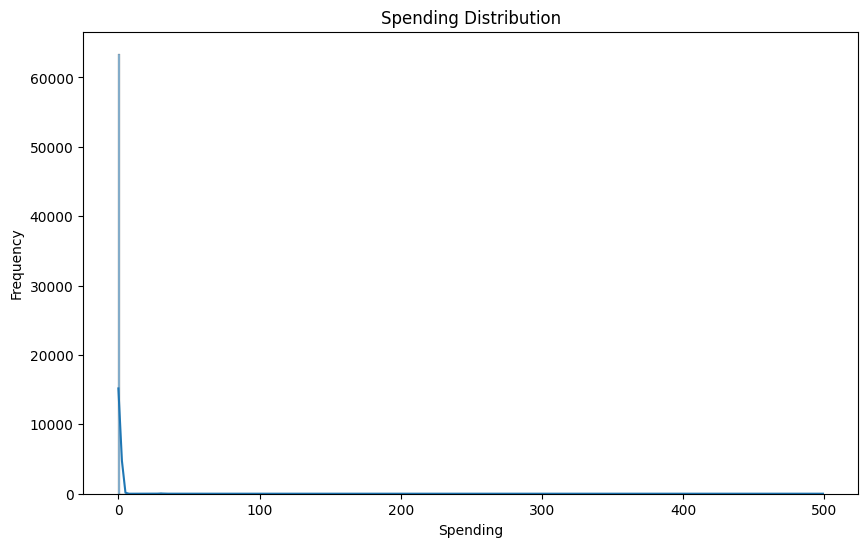

In [10]:
#spending distribution
plt.figure(figsize=(10,6))
sns.histplot(data= df, x="spend", kde=True)
plt.title('Spending Distribution')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.show()

spend
0.00      63422
29.99       136
30.24         1
30.70         1
30.94         1
          ...  
444.33        1
444.92        1
462.78        1
482.31        1
499.00       12
Name: count, Length: 429, dtype: int64
Percentage of customers who didn't spend: 99.096875%


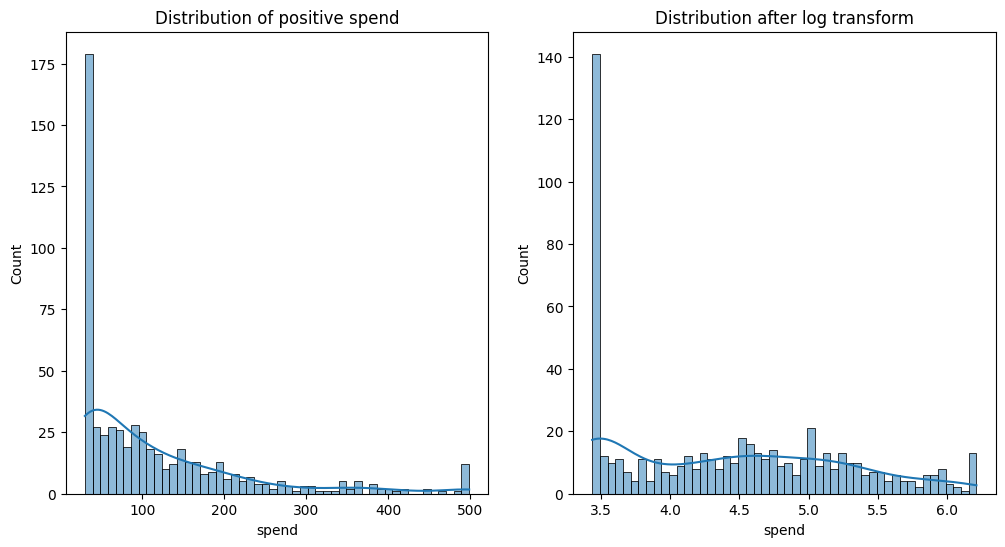

In [11]:
#EDA Spend
spend_count = df["spend"].value_counts()
print(spend_count.sort_index())

zero_fraction  = (df["spend"]==0).mean()
print (f"Percentage of customers who didn't spend: {zero_fraction*100}%")

positive_spend = df[df["spend"]>0]["spend"]

fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.histplot(data = positive_spend, bins = 50, ax=axes[0], kde = True)
axes[0].set_title("Distribution of positive spend")

sns.histplot(np.log1p(positive_spend), bins = 50, ax=axes[1], kde=True)
axes[1].set_title("Distribution after log transform")
plt.show()

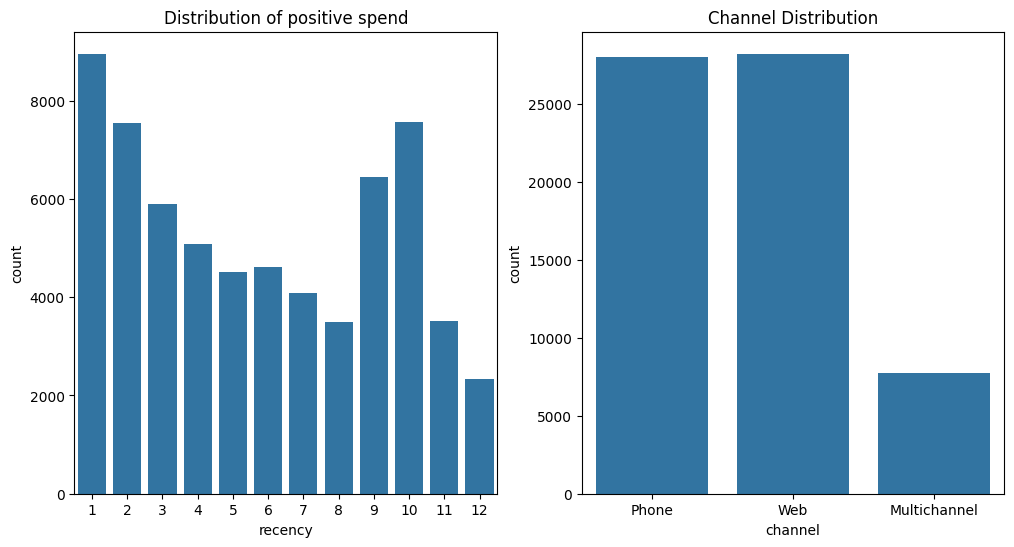

In [12]:
#EDA Recency and Channel
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data = df, x = 'recency', ax=axes[0])
axes[0].set_title("Distribution of positive spend")

sns.countplot(data = df, x = "channel", ax=axes[1])
axes[1].set_title("Channel Distribution")

plt.show()

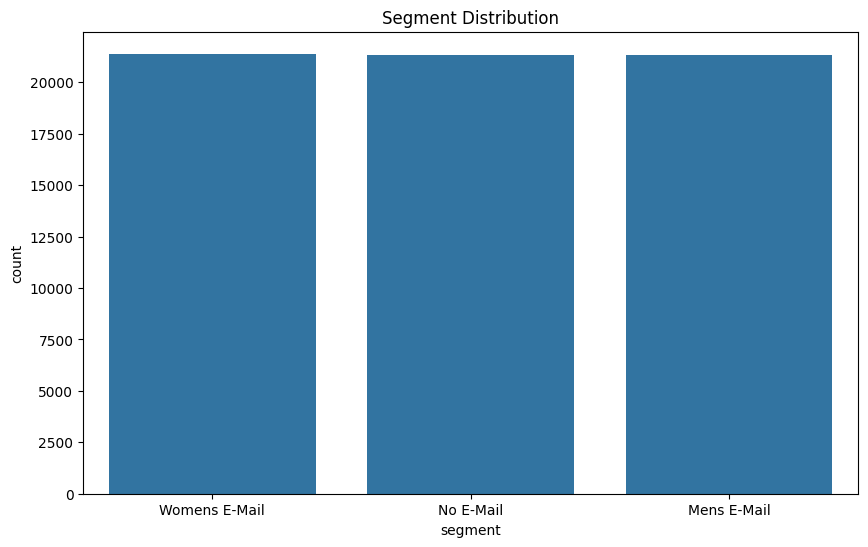

In [13]:
#EDA Segment distribution
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'segment')
plt.title("Segment Distribution")
plt.show()

In [16]:
#Split into Hillstrom-men and Hillstrom-women
df_men = df[df["segment"].isin(["Mens E-Mail", "No E-Mail"])].copy()

df_women = df[df["segment"].isin(["Womens E-Mail", "No E-Mail"])].copy()

df_men["treatment"] = df_men["segment"].map({"Mens E-Mail": 1, "No E-Mail": 0})
df_women["treatment"] = df_women["segment"].map({"Womens E-Mail": 1, "No E-Mail": 0})

df_men = df_men.drop(columns=["segment"])
df_women = df_women.drop(columns=["segment"])

df_men.to_csv("Hillstrom-Men.csv", index=True)
df_women.to_csv("Hillstrom-Women.csv", index=True)

print ("Hillstrom-men shape:", df_men.shape)
print ("Hillstrom-men shape:", df_women.shape)

Hillstrom-men shape: (42613, 12)
Hillstrom-men shape: (42693, 12)
